In [2]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.7 MB/s eta 0:00:00


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and direc

### 설치 후 세션 다시 시작 반드시 필수


*  세션 다시 시작하지 않으면 한글 오류 발생



기업: 네이버
상위 5개 키워드: 개발, 경험, 프로젝트, 기술, 결과

기업: 라인
상위 5개 키워드: 개발, 프로젝트, 경험, 기술, 활용

기업: 우아한 형제들
상위 5개 키워드: 형제, 서비스, 경험, 영업, 활동

기업: 카카오
상위 5개 키워드: 경험, 프로젝트, 서비스, 개발, 데이터

기업: 쿠팡
상위 5개 키워드: 개발, 서비스, 경험, 프로젝트, 프로그래밍



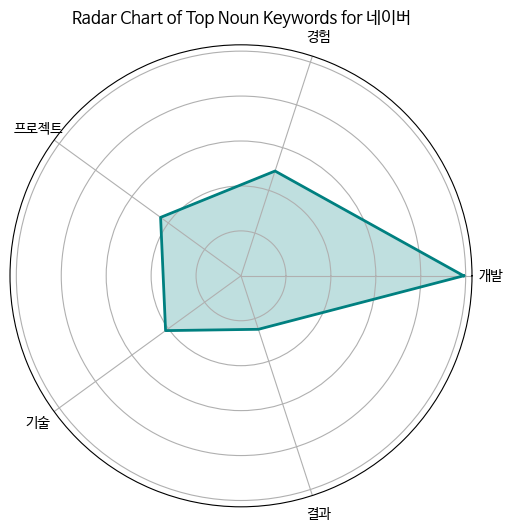

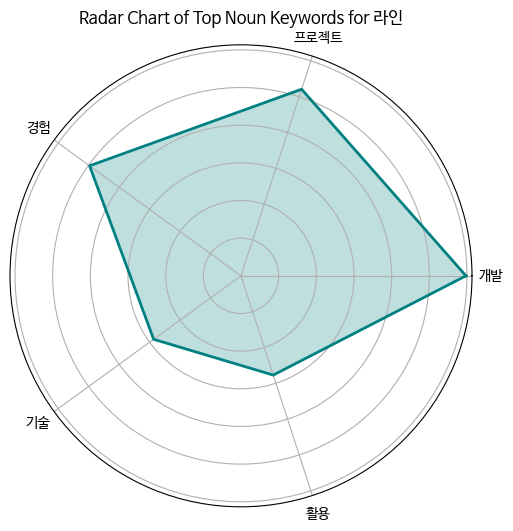

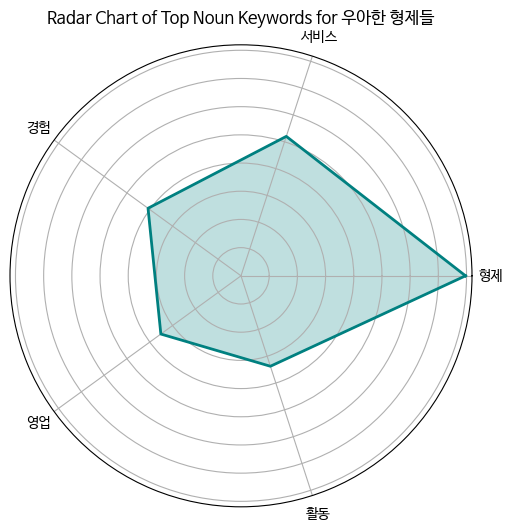

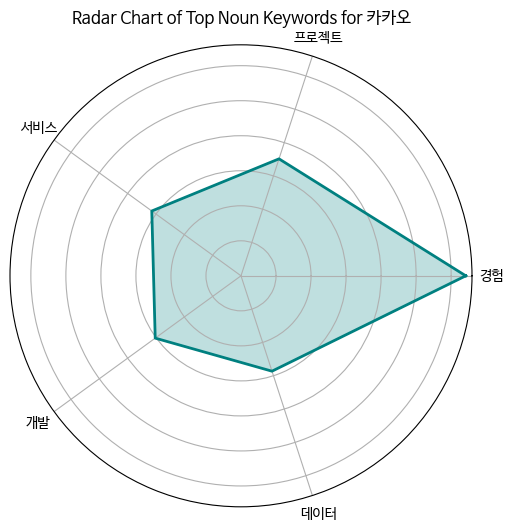

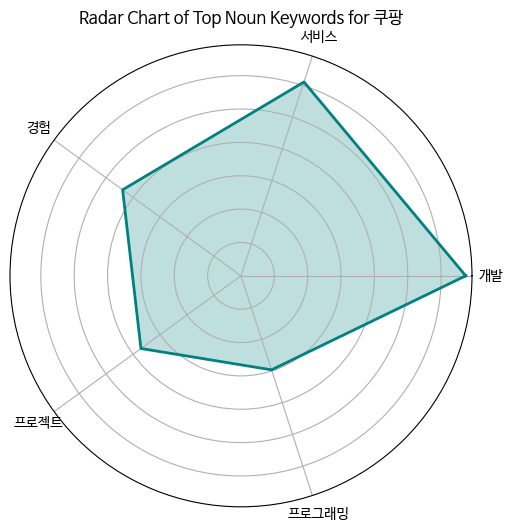

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
from konlpy.tag import Okt
import matplotlib as mpl
%matplotlib inline


plt.rc('font', family='NanumBarunGothic')


# CSV 파일 경로
csv_file_path = "/content/drive/MyDrive/output/crawl_merged_data.csv"


# 데이터프레임 읽기
df = pd.read_csv(csv_file_path)

# null 값을 빈 문자열로 대체
df['Contents'].fillna('', inplace=True)

# KoNLPy의 Okt 형태소 분석기를 사용하여 명사만 추출하여 토큰화하는 함수
def model_tokenize_nouns(text):
    okt = Okt()
    text = re.sub(r"[^가-힣a-zA-Z0-9]", " ", text)
    nouns = okt.nouns(text)
    return ' '.join(nouns)

# 데이터프레임에 명사 토큰화된 컬럼 추가
df['Noun_Tokens'] = df['Contents'].apply(model_tokenize_nouns)

# 데이터프레임을 'Company' 열을 기준으로 그룹화하여 각 기업별로 텍스트 데이터를 추출
grouped = df.groupby('Company')['Noun_Tokens'].apply(lambda x: ' '.join(x)).reset_index()

# stopwords 리스트에 추가할 단어
stopwords = [
    '작성', '사용', '본인', '분야', '진행',
    '통해', '자신', '문항', '생각', '게임',
    '라인', '질문', '지원', '배민', '회사',
    '배달', '카카오', '내용', '부분', '배송',
    '고객', '쿠팡', '카페', '개발자', '위해',
    '소개', '기입', '구현', '필수', '소설',
    '노래', '대한'
]

# TF-IDF 모델 초기화
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)

# TF-IDF 벡터화
texts = grouped['Noun_Tokens'].tolist()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# 모든 단어들의 TF-IDF 값 딕셔너리로 변환 (상위 10개 단어)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_dict = {}
for i, company_text in enumerate(texts):
    row = tfidf_matrix[i]
    indices = row.indices
    values = row.data
    word_values = {feature_names[idx]: value for idx, value in zip(indices, values)}
    sorted_words = sorted(word_values.items(), key=lambda x: x[1], reverse=True)[:10]  # 상위 10개 단어
    tfidf_dict[grouped['Company'][i]] = sorted_words

# 기업별 상위 단어 중 stopwords를 제외한 상위 5개 단어 출력
for company, keywords in tfidf_dict.items():
    print(f"기업: {company}")
    # TF-IDF 값으로부터 stopwords를 제외한 상위 단어 추출하여 5개까지 출력
    top_keywords = [keyword for keyword, _ in keywords if keyword not in stopwords][:5]
    print(f"상위 5개 키워드: {', '.join(top_keywords)}")
    print()

# 이후의 레이더 차트 그리는 부분은 이전과 동일하게 유지됩니다.


# TF-IDF 기준 상위 10개 키워드 추출
top_keywords = [keywords[0] for keywords in tfidf_dict.values()]


# 새로운 자기소개서가 저장된 CSV 파일 경로
new_resume_csv_path = "/content/drive/MyDrive/output/new_resume.csv"

# 새로운 자기소개서 데이터프레임 읽기
new_resume_df = pd.read_csv(new_resume_csv_path)

# null 값을 빈 문자열로 대체
new_resume_df['Contents'].fillna('', inplace=True)

# 새로운 자기소개서 데이터프레임에 명사 토큰화된 컬럼 추가
new_resume_df['Noun_Tokens'] = new_resume_df['Contents'].apply(model_tokenize_nouns)

# 새로운 자기소개서 텍스트 명사 토큰화
new_resume_tokens = ' '.join(new_resume_df['Noun_Tokens'])

# TF-IDF 벡터화
new_tfidf_matrix = tfidf_vectorizer.transform([new_resume_tokens])

# 새로운 자기소개서의 TF-IDF 값 딕셔너리로 변환
new_word_values = {feature_names[idx]: value for idx, value in zip(new_tfidf_matrix.indices, new_tfidf_matrix.data)}
new_sorted_words = sorted(new_word_values.items(), key=lambda x: x[1], reverse=True)[:5]
new_top_keywords = [word for word, _ in new_sorted_words]

# Function to draw closed radar chart
def draw_closed_radar_chart(ax, values, title, labels):
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)

    # Add the first point at the end to close the radar chart
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Draw the closed polygon
    ax.plot(angles, values, 'o-', linewidth=2, label=title)
    ax.fill(angles, values, alpha=0.25)

    # Annotate the axes with labels
    # for angle, label in zip(angles[:-1], labels):
    #     ax.text(angle, 1.1, label, ha='center', va='center', fontproperties=font_prop)

# Iterate through companies
for company, keywords in tfidf_dict.items():
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    # 상위 5개 키워드 추출
    top_keywords = [keyword for keyword, _ in keywords[:5]]

    # 꼭짓점에 해당하는 키워드를 레이더 차트의 라벨로 사용합니다.
    labels = top_keywords

    # 꼭짓점의 값을 가져옵니다.
    values = [value for _, value in keywords[:5]]

    # 원형 레이더 차트를 생성합니다.
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    values=np.concatenate((values,[values[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    ax.fill(angles, values, color='teal', alpha=0.25)
    ax.plot(angles, values, color='teal', linewidth=2)
    ax.set_yticklabels([])  # y축 라벨 숨김

    # 제목과 라벨을 설정합니다.
    ax.set_title(f'Radar Chart of Top Noun Keywords for {company}')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.show()